<a href="https://colab.research.google.com/github/Aravindh4404/DATA601UCal/blob/main/DATA601_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Aravindh Palaniguru UCID: 30301478

**About Dataset**

Historical stock data of SNP500 index from 19/09/2005 to 19/09/2025 was downloaded using the yfinance library, which provides programmatic access to Yahoo Finance's comprehensive financial database.

Dataset consists of:

1.   Time Period: Historical daily data
2.   Data Fields: 5 standard financial metrics per trading day:

*  Date: Trading date (Date/DateTime)
*  Open: Opening price (Numeric/Float)
*  High: Highest price during the trading day (Numeric/Float)
*  Low: Lowest price during the trading day (Numeric/Float)
*  Close: Closing price (Numeric/Float)
*  Volume: Number of shares traded per day (Numeric/Integer)

Prices appear in US dollar values.
Volume is in absolute number of shares that are traded per day



Below cell that connects Google colab to Googgle drive to access the dataset uploaded to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset of current top 5 five equities of SNP500 index as mentioned in the cell loaded from local CSVs: NVDA, AAPL, MSFT, AMZN, and META, with one file per ticker in the specified Drive folder.

Variables retained: Date (datetime), price fields Open/High/Low/Close/Adj Close (numeric where present), Volume (integer/numeric), and Stock (categorical).

For each stock symbol, the pipeline does the following:

**Data Loading Process:**
* File existence check: Verified CSV files exist using `os.path.exists()`
* Data structure validation: Confirmed presence of required 'Date' column with `if 'Date' in df.columns`
* Error handling: Print statements for missing files or missing Date column
* Stock labeling: Added categorical 'Stock' column with `df['Stock'] = stock`

**Cleaning Applied:**
* Date parsing: Converted 'Date' columns to datetime using `pd.to_datetime(df['Date'], errors='coerce')`
* Ordering: Sorted datasets by date using `df.sort_values('Date')`
* Missing value removal: Removed rows with any NaN using `df.dropna(how='any')`
* Index reset: Reset indices using `reset_index(drop=True)`
* Combined all stock datasets using `pd.concat(stock_data.values(), ignore_index=True)`

**Confirmation:**
* Row counts printed for each loaded stock
* Final dataset shape displayed
* Date range coverage shown from min to max dates

In [2]:
# Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder path
folder_path = '/content/drive/MyDrive/SNP500/stock_data/'

# List of stocks to process
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'META']

stock_data = {}

for stock in stocks:
    file_path = f'{folder_path}{stock}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Ensure 'Date' exists and then parse and tag
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Stock'] = stock
            # Sort, drop any row with any NaN, then reset index (only once needed here)
            df = df.sort_values('Date').dropna(how='any').reset_index(drop=True)
            stock_data[stock] = df
            print(f"Loaded {stock}: {len(df)}")
        else:
            print(f"Failed to load {stock}: 'Date' column missing")
    else:
        print(f"Failed to load {stock}: file not found")

# Combine all stock data
if stock_data:
    # Concatenate with ignore_index=True (creates clean 0-based index automatically)
    combined_df = pd.concat(stock_data.values(), ignore_index=True)

    # Clean and sort data
    combined_df = combined_df.dropna(how='any').sort_values(['Date', 'Stock'])

    # Add previous close column
    combined_df['Prev_Close'] = combined_df.groupby('Stock')['Close'].shift(1)

    # Eemove rows where Prev_Close is NaN and reset index once
    combined_df = combined_df.dropna(how='any').reset_index(drop=True)

else:
    print("\nNo stock data was loaded.")

Loaded NVDA: 5033
Loaded AAPL: 5033
Loaded MSFT: 5033
Loaded AMZN: 5033
Loaded META: 3354


In [3]:
combined_df #to see visually the dataframe created

,Date,Open,High,Low,Close,Volume,Stock,Prev_Close
0,2005-09-20,1.590766,1.615383,1.588665,1.596771,819828800.0,AAPL,1.580259
1,2005-09-20,2.132500,2.150500,2.088500,2.093500,69440000.0,AMZN,2.137500
2,2005-09-20,18.158935,18.263416,17.894248,17.998730,61043400.0,MSFT,18.110184
3,2005-09-20,0.252373,0.258179,0.252067,0.255353,522192000.0,NVDA,0.250463
4,2005-09-21,1.589866,1.592567,1.556843,1.564348,434747600.0,AAPL,1.596771
...,...,...,...,...,...,...,...,...
23476,2025-09-19,241.229996,246.300003,240.210007,245.500000,163470300.0,AAPL,237.880005
23477,2025-09-19,232.369995,234.160004,229.699997,231.479996,97810200.0,AMZN,231.229996
23478,2025-09-19,786.419983,790.799988,769.190002,778.380005,23663700.0,META,780.250000
23479,2025-09-19,510.559998,519.299988,510.309998,517.929993,52371500.0,MSFT,508.450012


This cell reports the dataset shape to show the number of rows and columns in scope.
It then lists each column’s inferred type as Date/Time, Categorical, Numeric (Financial), or Numeric (Count), along with the count of missing values for basic data health.
Volume is handled as a count variable, while price fields (Open, High, Low, Close, Adj Close) are treated as numeric financial measures for analysis.
The stock distribution prints row counts per ticker to confirm coverage and quickly spot any imbalance across symbols.

In [4]:

# Data Types Analysis
print("Dataset Info:")
print(f"Shape: {combined_df.shape}")

print("\nData Types:")
for col in combined_df.columns:
    dtype = combined_df[col].dtype
    null_count = combined_df[col].isna().sum()

    if 'object' in str(dtype):
        category = "Categorical"
    elif 'datetime' in str(dtype):
        category = "Date/Time"
    elif col == 'Volume':
        category = "Numeric (Count)"
    else:
        category = "Numeric (Financial)"

    print(f"{col}: {category} | Missing: {null_count}")

print(f"\nStock distribution:")
print(combined_df['Stock'].value_counts())

Dataset Info:
Shape: (23481, 8)

Data Types:
Date: Date/Time | Missing: 0
Open: Numeric (Financial) | Missing: 0
High: Numeric (Financial) | Missing: 0
Low: Numeric (Financial) | Missing: 0
Close: Numeric (Financial) | Missing: 0
Volume: Numeric (Count) | Missing: 0
Stock: Categorical | Missing: 0
Prev_Close: Numeric (Financial) | Missing: 0

Stock distribution:
Stock
AAPL    5032
AMZN    5032
MSFT    5032
NVDA    5032
META    3353
Name: count, dtype: int64


This cell reports count, mean, median, standard deviation, min/max, and quartiles for Open, High, Low, Close, and Volume using pandas' built-in statistical functions (len(), data.mean(), data.median(), data.std(), data.min(), data.max(), data.quantile()). Quartiles and the range help flag potential outliers, while a noticeable gap between mean and median can indicate skew.

In [5]:

# Summary Statistics
key_vars = ['Open', 'High', 'Low', 'Close', 'Volume']

print("Summary Statistics:")
for var in key_vars:
    data = combined_df[var]
    stats = {
        'count': len(data),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'min': data.min(),
        'max': data.max(),
        'q1': data.quantile(0.25),
        'q3': data.quantile(0.75)
    }

    print(f"\n{var}:")
    for stat, val in stats.items():
      print(f"  {stat}: {val:.2f}")

Summary Statistics:

Open:
  count: 23481.00
  mean: 84.32
  median: 26.93
  std: 117.52
  min: 0.14
  max: 791.15
  q1: 6.45
  q3: 131.25

High:
  count: 23481.00
  mean: 85.29
  median: 27.24
  std: 118.82
  min: 0.15
  max: 796.25
  q1: 6.53
  q3: 132.75

Low:
  count: 23481.00
  mean: 83.34
  median: 26.66
  std: 116.16
  min: 0.13
  max: 780.82
  q1: 6.34
  q3: 129.61

Close:
  count: 23481.00
  mean: 84.35
  median: 26.93
  std: 117.52
  min: 0.14
  max: 790.00
  q1: 6.45
  q3: 131.12

Volume:
  count: 23481.00
  mean: 225606187.96
  median: 84532000.00
  std: 307573385.76
  min: 4726100.00
  max: 3692928000.00
  q1: 37901700.00
  q3: 315780000.00


The dataset is sorted by Stock and Date to ensure time-series calculations occur in proper chronological order within each ticker.

**Continuous Features:**
- **Daily_Return** calculates the percent day-over-day change in closing price using `pct_change()`
- **Daily_Volatility** measures intraday price range as (High - Low)/Open × 100, providing a normalized volatility metric
- **Price_Change** captures the absolute dollar difference in closing prices to show direction and magnitude
- **Volume_Change** tracks percent change in trading activity between consecutive days
- **Price_Position** places the closing price within the day's trading range on a 0-100 scale; defaults to 50 when High equals Low to prevent division by zero

**Categorical Features (Binned):**
- **Return_Category** bins daily returns into three groups: Negative (< -0.4%), Neutral (-0.4% to +0.4%), and Positive (> +0.4%) using `pd.cut()`
- **Volatility_Level** categorizes intraday volatility as Low (0-2%), Medium (2-4%), or High (> 4%) based on the Daily_Volatility values
- **Price_Change_Category** creates binary Up/Down labels based on whether the price change is positive or negative

The binning approach using `pd.cut()` with specified breakpoints transforms continuous variables into categorical ones, enabling straightforward distribution analysis and visualization across different market conditions. Finally, `dropna()` removes any incomplete records to ensure clean data for analysis.

In [6]:
# Data Preprocessing and Feature Engineering
# Sort data properly

combined_df = combined_df.sort_values(['Stock', 'Date']).reset_index(drop=True)

combined_df['Daily_Return'] = combined_df.groupby('Stock')['Close'].pct_change() * 100
combined_df['Daily_Volatility'] = ((combined_df['High'] - combined_df['Low']) / combined_df['Open'] * 100)
combined_df['Price_Change'] = combined_df.groupby('Stock')['Close'].diff()
combined_df['Volume_Change'] = combined_df.groupby('Stock')['Volume'].pct_change() * 100

price_range = combined_df['High'] - combined_df['Low']
combined_df['Price_Position'] = np.where(
    price_range > 0,
    ((combined_df['Close'] - combined_df['Low']) / price_range * 100),
    50
)

combined_df['Return_Category'] = pd.cut(
    combined_df['Daily_Return'],
    bins=[-np.inf, -0.4, 0.4, np.inf],
    labels=['Negative', 'Neutral', 'Positive']
)

combined_df['Volatility_Level'] = pd.cut(
    combined_df['Daily_Volatility'],
    bins=[0, 2, 4, np.inf],
    labels=['Low', 'Medium', 'High']
)

combined_df['Price_Change_Category'] = pd.cut(
    combined_df['Price_Change'],
    bins=[-np.inf, 0, np.inf],
    labels=['Down', 'Up']
)


# Remove rows with any NaN values
combined_df = combined_df.dropna().reset_index(drop=True)
display(combined_df.head(20))
print(f"Features created. Dataset shape: {combined_df.shape}")
print(f"New features: Daily_Return, Daily_Volatility, Price_Change, Volume_Change, MA_5, Price_Position")

,Date,Open,High,Low,Close,Volume,Stock,Prev_Close,Daily_Return,Daily_Volatility,Price_Change,Volume_Change,Price_Position,Return_Category,Volatility_Level,Price_Change_Category
0,2005-09-21,1.589866,1.592567,1.556843,1.564348,4.347476e+08,AAPL,1.596771,-2.030522,2.246973,-0.032423,-46.970929,21.006970,Negative,Medium,Down
1,2005-09-22,1.557443,1.575156,1.540632,1.558043,4.637276e+08,AAPL,1.564348,-0.403004,2.216685,-0.006304,6.665937,50.433480,Negative,Medium,Down
2,2005-09-23,1.564048,1.606076,1.556243,1.597070,5.584572e+08,AAPL,1.558043,2.504863,3.186145,0.039027,20.427855,81.927897,Positive,Medium,Up
3,2005-09-26,1.621987,1.637897,1.600673,1.616283,5.465628e+08,AAPL,1.597070,1.202998,2.294981,0.019213,-2.129868,41.935293,Positive,Medium,Up
4,2005-09-27,1.618684,1.628291,1.603974,1.604275,3.417036e+08,AAPL,1.616283,-0.742966,1.502248,-0.012008,-37.481365,1.234166,Negative,Low,Down
5,2005-09-28,1.593167,1.594369,1.518718,1.533428,1.125544e+09,AAPL,1.604275,-4.416127,4.748448,-0.070847,229.391906,19.444485,Negative,High,Down
6,2005-09-29,1.537930,1.578757,1.525322,1.571253,6.368460e+08,AAPL,1.533428,2.466703,3.474502,0.037825,-43.418827,85.955760,Positive,Medium,Up
7,2005-09-30,1.570953,1.610579,1.557443,1.609379,5.316332e+08,AAPL,1.571253,2.426456,3.382368,0.038126,-16.520917,97.740996,Positive,Medium,Up
8,2005-10-03,1.625890,1.637298,1.611480,1.634296,5.075532e+08,AAPL,1.609379,1.548253,1.587875,0.024917,-4.529439,88.373284,Positive,Low,Up
9,2005-10-04,1.649606,1.661614,1.610279,1.613582,5.394592e+08,AAPL,1.634296,-1.267475,3.111949,-0.020714,6.286238,6.433422,Negative,Medium,Down


Features created. Dataset shape: (23476, 16)
New features: Daily_Return, Daily_Volatility, Price_Change, Volume_Change, MA_5, Price_Position


This plot plotted using matplotlib shows each ticker’s Close over time on the same axes to compare levels and trends.
Titles, axis labels with units, a legend keyed by ticker, and a light grid are included to keep the time series readable.
Lines are drawn in date order for each stock across the full sample period.


Line plots was used for stock price evolution since it is appropriate for time-series data to show trends over time


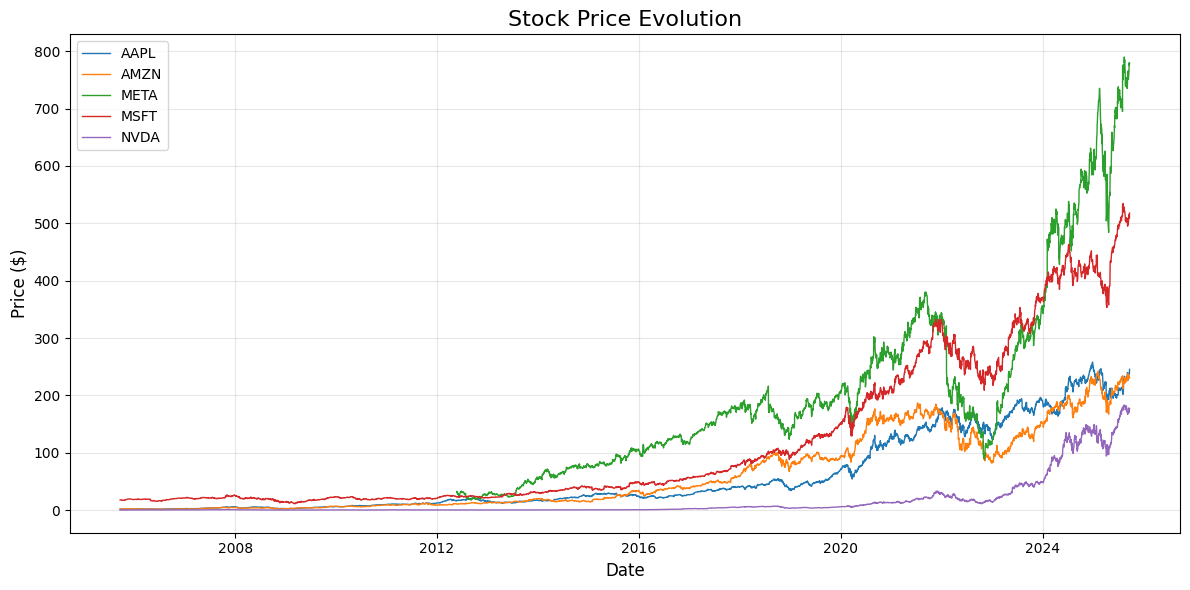

In [7]:

plt.figure(figsize=(12, 6))

# Stock price evolution
for stock in combined_df['Stock'].unique():
    stock_data = combined_df[combined_df['Stock'] == stock].sort_values('Date')
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock, linewidth=1)

plt.title('Stock Price Evolution', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation of Stock Price Evolution graph**

**Price Levels & Growth Trajectories:**
- **NVDA (purple)** shows the most dramatic growth, remaining relatively flat until ~2023, then experiencing strong growth (possibly due to AI boom)
- **META (green)** demonstrates strong consistent growth after its later IPO around 2012
- **MSFT (red)** shows steady appreciation with notable acceleration after 2016
- **AAPL (blue)** and **AMZN (orange)** show more moderate but consistent growth trajectories

- All stocks show synchronized major dips around 2020 (possibly due to COVID), and 2022 (possibly due to Ukraine-Russia war)

**Code Description:**

The code creates a 2x3 grid of bar charts, with each chart showing one stock's daily return distribution. For each stock, it counts how many trading days fell into three categories: Positive returns (green bars), Negative returns (red bars), and Neutral returns (gray bars). The categories are based on the earlier binning where returns < -0.4% = Negative, -0.4% to +0.4% = Neutral, and > +0.4% = Positive.

We cannot really use this data for analysing long term investments since the magnitude of positive or negative return cannot be interpreted from the graphs. BUt this data may be useful for day traders who buys and sells financial assets within the same day to profit from short-term price fluctuations.

Bar chart for return distributions is used since it is good for comparing categorical frequency data across stocks



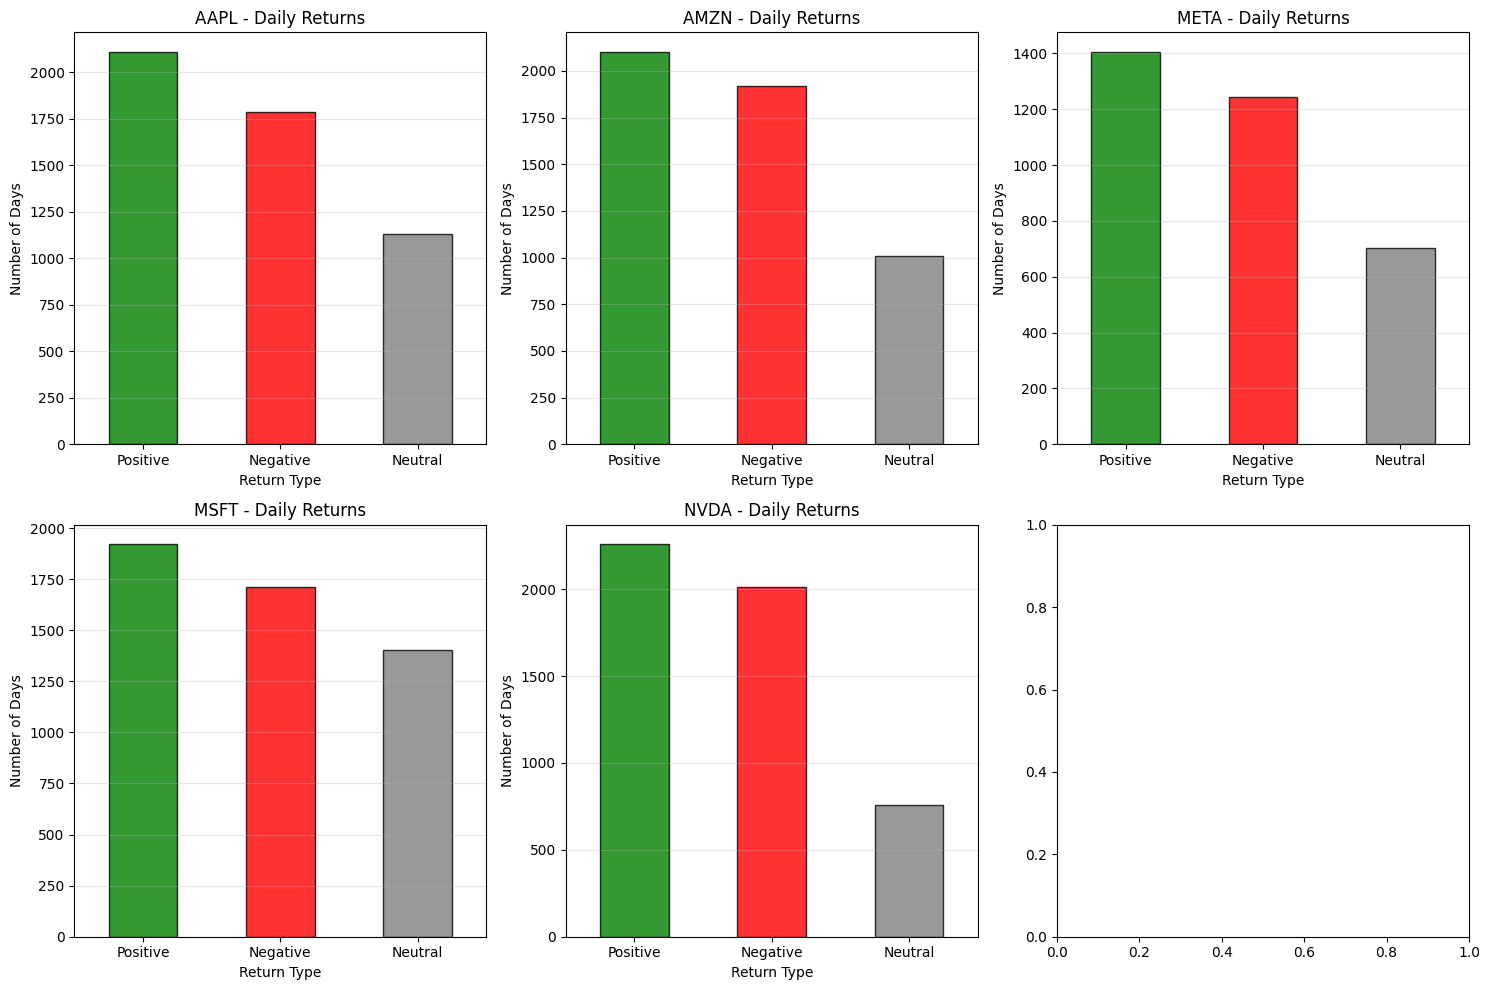

In [8]:
# Get list of all stock names
stock_names = combined_df['Stock'].unique()

# Create 6 charts in a 2x3 grid
fig, charts = plt.subplots(2, 3, figsize=(15, 10))
charts = charts.flatten()  # Make it easier to access each chart

# Colors for the bars
bar_colors = ['green', 'red', 'gray']

# Make one chart for each stock
for chart_number, stock_name in enumerate(stock_names):

    # Get data for just this one stock
    one_stock_data = combined_df[combined_df['Stock'] == stock_name]

    # Count how many days were Positive, Negative, Neutral
    daily_return_counts = one_stock_data['Return_Category'].value_counts()

    # Make a bar chart
    daily_return_counts.plot(kind='bar',
                           color=bar_colors,
                           alpha=0.8,
                           edgecolor='black',
                           ax=charts[chart_number])

    # Add labels and formatting
    charts[chart_number].set_title(f'{stock_name} - Daily Returns', fontsize=12)
    charts[chart_number].set_xlabel('Return Type', fontsize=10)
    charts[chart_number].set_ylabel('Number of Days', fontsize=10)
    charts[chart_number].tick_params(axis='x', rotation=0)
    charts[chart_number].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


**Interpretation:**

All five tech stocks (AAPL, AMZN, META, MSFT, NVDA) show similar patterns with positive days higher and significant amount of negative days and least neutral days.

This is subject to the limits set in the code for calculating them.


**Code Description**

This code analyzes the distribution of daily returns for each stock by categorizing them into 8 ranges from "<-5%" to ">5%" and counting how many trading days fall into each range. It calculates the percentage of days in each return category for every stock and stores the results in a DataFrame. This chart bins Daily Return Range into ranges and shows, for each stock, what percentage of trading days fell into each category.



,Stock,Return_Category,Days_in_Range,Percentage
0,AAPL,<-5%,62,1.232359
1,AAPL,-5 to -2%,489,9.719738
2,AAPL,-2 to -1%,555,11.031604
3,AAPL,-1 to 0%,1258,25.004969
4,AAPL,0 to 1%,1270,25.243490
5,AAPL,1 to 2%,786,15.623137
6,AAPL,2 to 5%,538,10.693699
7,AAPL,>5%,73,1.451004
8,AMZN,<-5%,91,1.808786
9,AMZN,-5 to -2%,522,10.375671


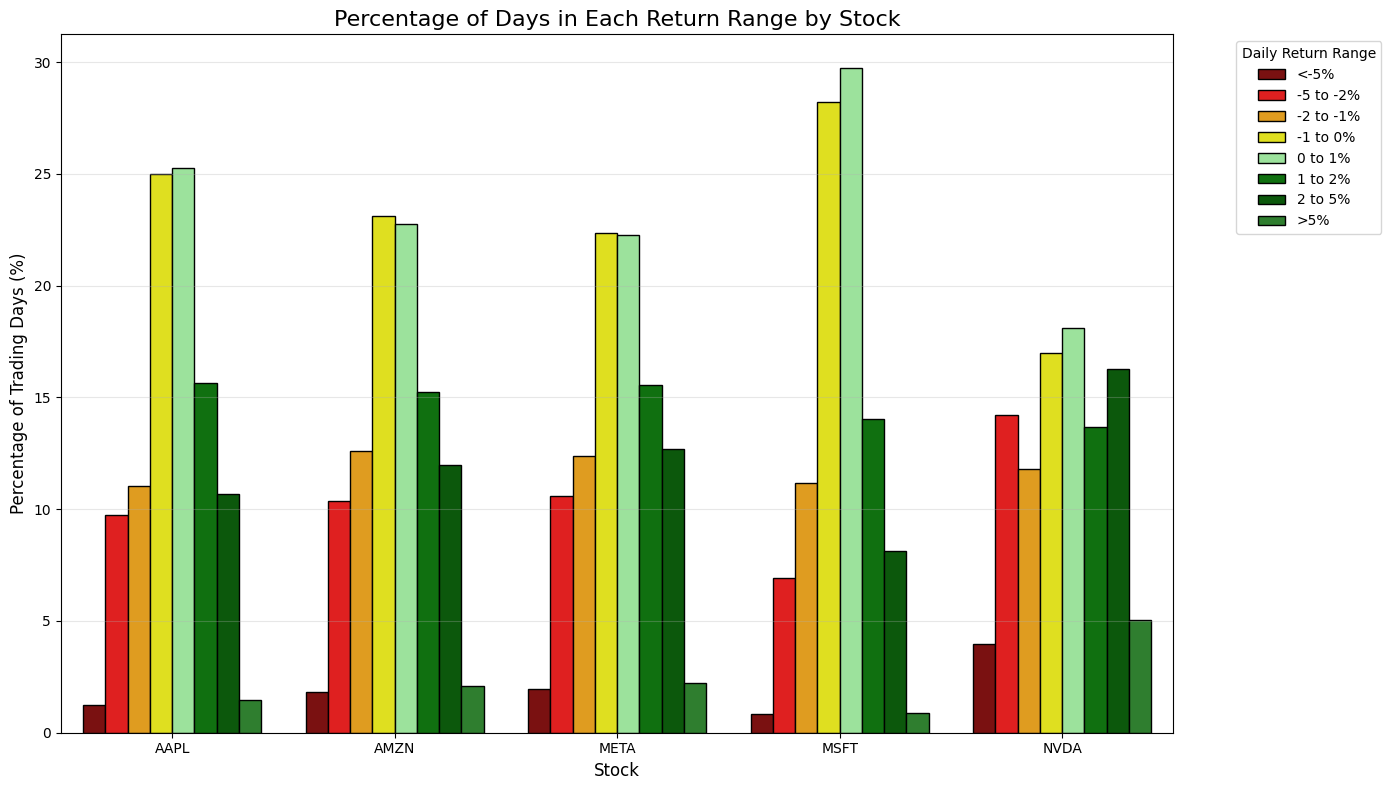

In [9]:
# Simple Daily Return Distribution Analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Define return ranges from worst to best
return_categories = ['<-5%', '-5 to -2%', '-2 to -1%', '-1 to 0%', '0 to 1%', '1 to 2%', '2 to 5%', '>5%']

# The actual number ranges for each category
bucket_ranges = [-100, -5, -2, -1, 0, 1, 2, 5, 100]  # Using -100 and 100 as extremes


stocks_to_analyze = combined_df['Stock'].unique()



all_results = []

for stock_name in stocks_to_analyze:

    # Get daily returns for this stock
    stock_data = combined_df[combined_df['Stock'] == stock_name]
    daily_returns = stock_data['Daily_Return'].dropna()
    total_days = len(daily_returns)


    # Count how many days fall into each return category
    for i, category in enumerate(return_categories):
        min_return = bucket_ranges[i]
        max_return = bucket_ranges[i + 1]

        # Count days in this range
        if i == 0:  # First category: less than -5%
            days_in_range = len(daily_returns[daily_returns < -5])
        elif i == len(return_categories) - 1:  # Last category: greater than 5%
            days_in_range = len(daily_returns[daily_returns >= 5])
        else:  # Middle categories: between two values
            days_in_range = len(daily_returns[(daily_returns >= min_return) & (daily_returns < max_return)])

        # Calculate percentage
        percentage = (days_in_range / total_days) * 100

        # Store the result
        all_results.append({
            'Stock': stock_name,
            'Return_Category': category,
            'Days_in_Range': days_in_range,
            'Percentage': percentage
        })

# table
results_df = pd.DataFrame(all_results)
display(results_df.head(10))

# graph
plt.figure(figsize=(14, 8))

# Get unique stocks for x-axis positioning
unique_stocks = results_df['Stock'].unique()
x_positions = range(len(unique_stocks))

# Set up colors (green spectrum from red to green)
colors = ['darkred', 'red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen', 'forestgreen']

sns.barplot(data=results_df, x='Stock', y='Percentage', hue='Return_Category',
            palette=colors, edgecolor='black')

# Format the chart
plt.title('Percentage of Days in Each Return Range by Stock', fontsize=16)
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Percentage of Trading Days (%)', fontsize=12)
plt.legend(title='Daily Return Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**Interpretation**

Most stocks show similar moderate behavior with relatively balanced distributions, with the majority of trading days falling in the small positive ranges, indicating steady but small daily gains. Overall even with magnitute of returns it shows that positive returns are in general higher than negative returns. This can be useful for long term investors since over the years this shows that the gains are more than losses.

**Code Description:**
The code creates two complementary visualizations using seaborn: a violin plot (left) showing the full distribution shape of daily returns across different volatility levels, and a box plot (right) summarizing daily volatility statistics across return categories.


Violin plots: Show full distribution shapes of returns across volatility levels, revealing skewness and outliers

Box plots: Show volatility distributions with quartiles, highlighting median and outliers

Although both are similar both are included to provide good interpretations of the data.

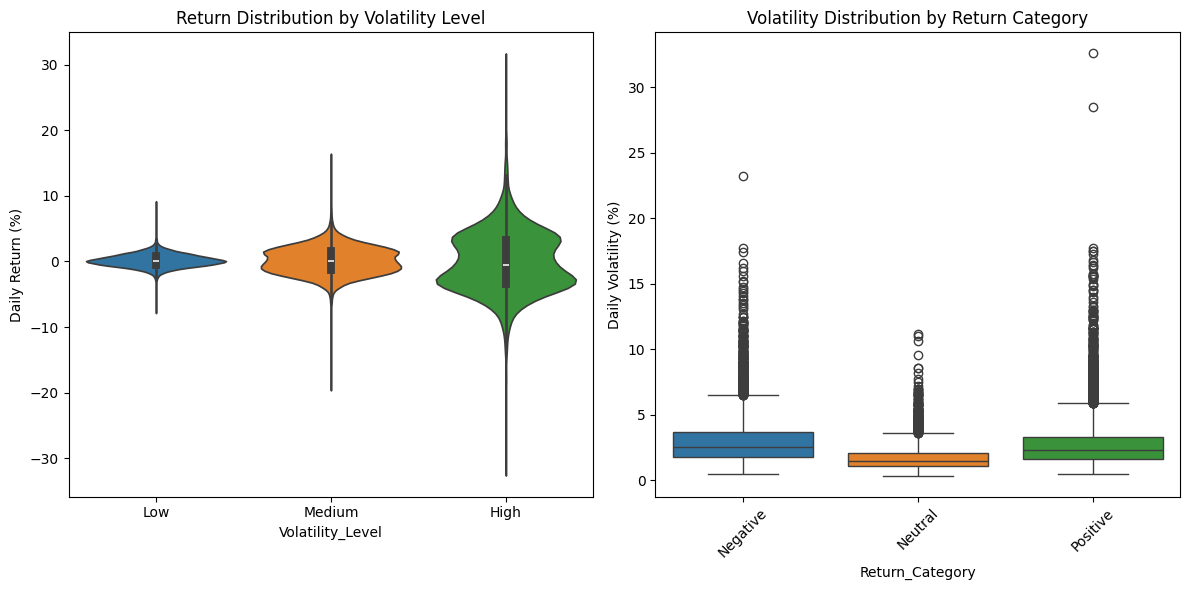

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=combined_df, x='Volatility_Level', y='Daily_Return', hue='Volatility_Level', legend=False)
plt.title('Return Distribution by Volatility Level')
plt.ylabel('Daily Return (%)')

plt.subplot(1, 2, 2)
sns.boxplot(data=combined_df, x='Return_Category', y='Daily_Volatility', hue='Return_Category', legend=False)
plt.title('Volatility Distribution by Return Category')
plt.ylabel('Daily Volatility (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation:**

**Left Plot - Return Distribution by Volatility Level:**
- **Low volatility days** show a narrow, concentrated distribution of returns
- **Medium volatility days** display a wider distribution with returns
- **High volatility days** exhibit the broadest distribution with extreme returns reaching -30% to +30%, demonstrating that high volatility periods can produce both large gains and losses
- All distributions are roughly centered around 0%, but the "width" increases drastically with volatility level

**Right Plot - Volatility Distribution by Return Category:**
- **Negative return days** show median volatility around 3-4%, with many outliers extending to 15%+, suggesting bad news often comes with increased market uncertainty
- **Neutral return days** display the lowest median volatility (~2%), indicating quiet, stable trading periods
- **Positive return days** show slightly higher median volatility than neutral days (~3%), with numerous outliers reaching 15-30%

 These show thata there's a relationship between volatility and return magnitude - higher volatility enables both bigger gains and bigger losses, while low volatility constrains returns to smaller ranges. Negative days tend to be more volatile than positive days, reflecting the common market phenomenon that "stocks take the stairs up and the elevator down."

**Code Description:**

This cell computes a Pearson correlation matrix for numeric variables and visualizes it with a masked upper triangle so each pair appears once.
A diverging palette centered at zero highlights direction and strength, with annotations for readable values.
The printed summary lists correlations above a small threshold to focus attention on relationships that are more likely to matter.

Heatmap is good for correlation matrix visualization, using color intensity to represent relationship strength

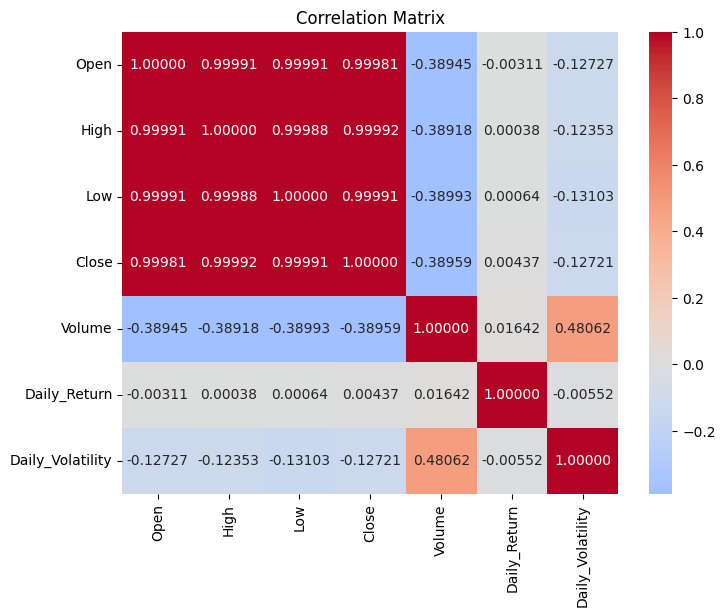

Strong correlations (>0.5):
Open - High: 1.00
Open - Low: 1.00
Open - Close: 1.00
High - Low: 1.00
High - Close: 1.00
Low - Close: 1.00


In [11]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Daily_Volatility']
corr = combined_df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.5f')
plt.title('Correlation Matrix')
plt.show()

# Print strong correlations (>0.5)
print("Strong correlations (>0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        val = corr.iloc[i, j]
        if abs(val) > 0.5:
            print(f"{corr.columns[i]} - {corr.columns[j]}: {val:.2f}")

**Interpretation:**

Strong Price Relationships (0.999+ correlations):

Open, High, Low, and Close prices move almost perfectly together
Indicates that there is no huge changes happening in stock prices within a single day.

Moderate negative correlation (around -0.39) between stock prices during the day (Open, High, Low, and Close) and Volume. This can indicate that the price of the stock on the particular day influences how much volume is being traded. If the price is lower there are more trades and vice versa.

Very weak correlation (-0.0055) between Daily Returns and Volatility
No clear daily risk-reward relationship
Although we have another interpretation from the violin plot and box plot earlier this can prove that returns aren't predictable from volatility alone. But at the same time correltion may not work well between return and volatility since volatility can cause return to increase or decrease so there is no linear relatonship here.

**Code Description:**

This code creates a Pearson correlation matrix to measure how similarly the five tech stocks (AAPL, AMZN, META, MSFT, NVDA) move together over time. It reshapes the stock data so each stock becomes a separate column, calculates correlations between their closing prices, and displays the results in a color-coded heatmap.

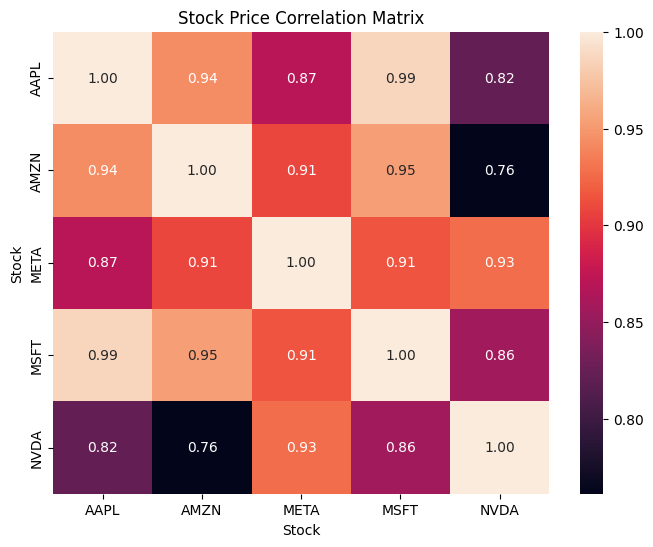

Stock  AAPL  AMZN  META  MSFT  NVDA
Stock                              
AAPL   1.00  0.94  0.87  0.99  0.82
AMZN   0.94  1.00  0.91  0.95  0.76
META   0.87  0.91  1.00  0.91  0.93
MSFT   0.99  0.95  0.91  1.00  0.86
NVDA   0.82  0.76  0.93  0.86  1.00


In [12]:
# Simple Stock Correlation Matrix using Pearson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Reshape data so each stock is a column
stock_pivot = combined_df.pivot(index='Date', columns='Stock', values='Close')

# Step 2: Calculate Pearson correlation between stocks
correlation_matrix = stock_pivot.corr(method='pearson')

# Step 3: Create simple heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,      # Show numbers *
            fmt='.2f')       # 2 decimal places

plt.title('Stock Price Correlation Matrix')
plt.show()

# Step 4: Print the numbers
print(correlation_matrix.round(2))

**Strongest Relationships:**
- **AAPL and MSFT** have a high correlation, meaning they move almost identically - possibly since they're both tech giants with similar market.
- **AMZN and MSFT** also show very strong correlation.

- **NVDA has low correlations** with traditional tech stocks, suggesting it may follow somewhat different market patterns

**Overall Pattern:**
All correlations are quite high, showing that these tech stocks generally move as a group during market ups and downs, but NVDA's unique position possibly due to semiconductor industry makes it a bit unique.

This code identifies the best and worst 365-day performance periods for each stock by calculating forward-looking annual returns and finding the maximum growth and steepest decline periods.
For every single day in the dataset, the code calculates a potential 365-day return starting from that day.

It then creates a comparison bar chart showing the percentage gains/losses for these extreme periods across all stocks, with green bars for growth and red bars for falls.

,Stock,Type,Start_Date,End_Date,Start_Price,End_Price,Return_Percent
0,AAPL,Best Growth,2006-07-14,2007-12-24,1.521120,5.968000,292.342554
1,AAPL,Worst Fall,2007-09-26,2009-03-09,4.586172,2.494971,-45.597952
2,AMZN,Best Growth,2008-11-20,2010-05-05,1.751500,6.546500,273.765354
3,AMZN,Worst Fall,2021-07-12,2022-12-19,185.927505,84.919998,-54.326285
4,META,Best Growth,2022-11-03,2024-04-18,88.424896,499.591614,464.989765
5,META,Worst Fall,2021-05-26,2022-11-03,325.872253,88.424896,-72.865166
6,MSFT,Best Growth,2020-03-16,2021-08-24,129.171234,292.822296,126.693116
7,MSFT,Worst Fall,2007-11-01,2009-04-15,26.533306,13.870062,-47.725844
8,NVDA,Best Growth,2023-01-05,2024-06-18,14.251528,135.529541,850.982541
9,NVDA,Worst Fall,2007-09-12,2009-02-23,0.761473,0.166415,-78.145703


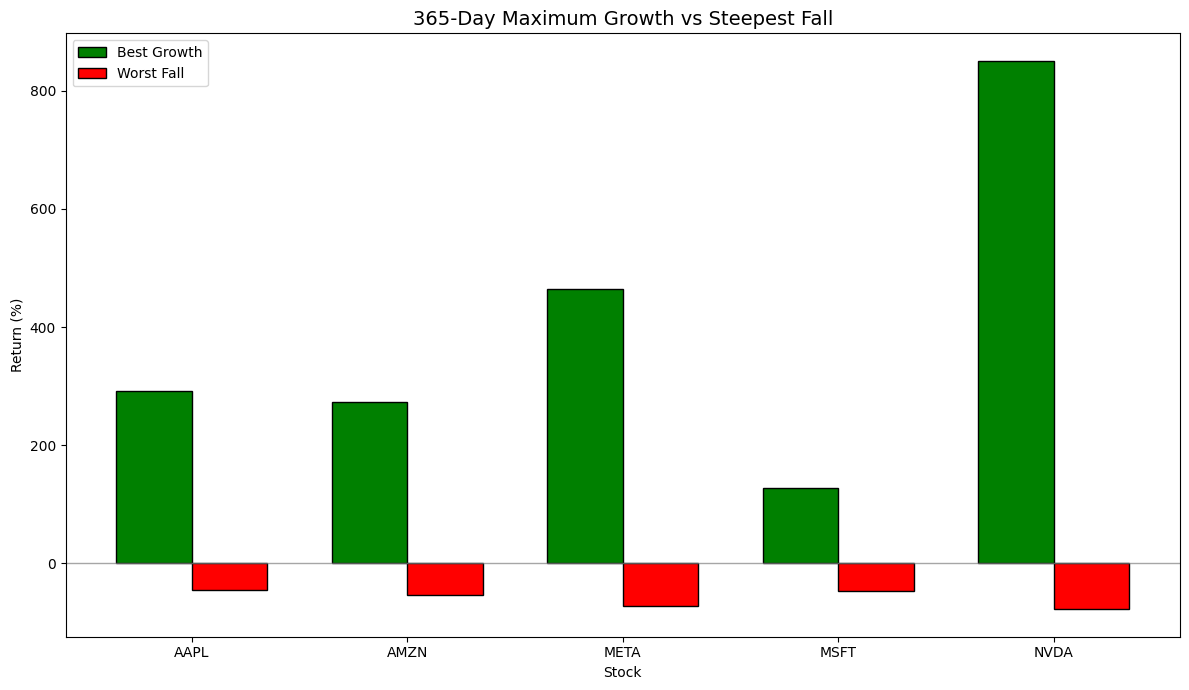

In [13]:
# Sort data so dates go from oldest to newest for each stock
df = combined_df.sort_values(['Stock', 'Date']).copy()
df = df.reset_index(drop=True)

# Calculate all possible 365-day returns
# For every row, calculate what would happen if you bought and held for 365 days
all_returns = []

for i in range(len(df)):
    current_row = df.iloc[i]
    stock_name = current_row['Stock']
    start_date = current_row['Date']
    start_price = current_row['Close']

    # Look for the same stock 364 positions later (which is 365 days total)
    end_position = i + 364

    # Check if we have data 365 days later for the same stock
    if end_position < len(df):
        future_row = df.iloc[end_position]

        # Make sure it's the same stock and prices are valid
        if (future_row['Stock'] == stock_name and
            start_price > 0 and
            future_row['Close'] > 0):

            end_date = future_row['Date']
            end_price = future_row['Close']

            # Calculate the return percentage
            return_percent = ((end_price / start_price) - 1) * 100

            # Store all the details
            all_returns.append({
                'Stock': stock_name,
                'Start_Date': start_date,
                'End_Date': end_date,
                'Start_Price': start_price,
                'End_Price': end_price,
                'Return_Percent': return_percent
            })

# Convert to DataFrame
returns_df = pd.DataFrame(all_returns)

final_results = []

# Go through each stock one by one
for stock_name in df['Stock'].unique():

    # Get all 365-day periods for this stock
    stock_returns = returns_df[returns_df['Stock'] == stock_name]

    if len(stock_returns) > 0:
        # Find the row with highest return (best growth)
        best_growth_idx = stock_returns['Return_Percent'].idxmax()
        best_growth = stock_returns.loc[best_growth_idx]

        # Add to final results
        final_results.append({
            'Stock': stock_name,
            'Type': 'Best Growth',
            'Start_Date': best_growth['Start_Date'],
            'End_Date': best_growth['End_Date'],
            'Start_Price': best_growth['Start_Price'],
            'End_Price': best_growth['End_Price'],
            'Return_Percent': best_growth['Return_Percent']
        })

        # Find the row with lowest return (worst fall)
        worst_fall_idx = stock_returns['Return_Percent'].idxmin()
        worst_fall = stock_returns.loc[worst_fall_idx]

        # Add to final results
        final_results.append({
            'Stock': stock_name,
            'Type': 'Worst Fall',
            'Start_Date': worst_fall['Start_Date'],
            'End_Date': worst_fall['End_Date'],
            'Start_Price': worst_fall['Start_Price'],
            'End_Price': worst_fall['End_Price'],
            'Return_Percent': worst_fall['Return_Percent']
        })

# results table
results_table = pd.DataFrame(final_results)
display(results_table)

# Separate growth and fall data
growth_data = results_table[results_table['Type'] == 'Best Growth'].copy()
fall_data = results_table[results_table['Type'] == 'Worst Fall'].copy()

# bar graph
plt.figure(figsize=(12, 7))

# Get stock names and their positions for x-axis
stock_names = growth_data['Stock'].tolist()
x_positions = list(range(len(stock_names)))

# Create bars side by side
bar_width = 0.35
growth_positions = [x - bar_width/2 for x in x_positions]
fall_positions = [x + bar_width/2 for x in x_positions]

# Plot the bars
growth_bars = plt.bar(growth_positions, growth_data['Return_Percent'],
                     bar_width, label='Best Growth', color='green', edgecolor='black')
fall_bars = plt.bar(fall_positions, fall_data['Return_Percent'],
                   bar_width, label='Worst Fall', color='red', edgecolor='black')

# Add horizontal line at 0%
plt.axhline(0, color='gray', linewidth=1, alpha=0.7)

# Labels and title
plt.title('365-Day Maximum Growth vs Steepest Fall', fontsize=14)
plt.ylabel('Return (%)')
plt.xlabel('Stock')
plt.xticks(x_positions, stock_names)
plt.legend()
plt.tight_layout()
plt.show()

The table lists, for each stock, the single best 365‑day growth window and the single worst 365‑day fall window, with start/end dates, start/end prices, and the simple percent return over that year.
“Growth” marks the top one‑year gain from a given start date, and “Fall” marks the steepest one‑year loss from a given start date; returns are based on Close prices.

The same information can also be interpreted in a visual way from the bar graph above.

**Key Interpretation**

NVDA has a high +851% one‑year increase in 2023–2024, but it also shows the largest drop of 78% in 2007–2009.
META shows a strong increase (+465% in 2022–2024) following a deep decrese (−72.9% in 2021–2022).

**Limitations**

* Dataset only includes successful large-cap tech stocks, not representative of broader market
* These companies survived and thrived, excluding failed companies from analysis
* Only top 5 stocks analyzed, may not represent sector-wide patterns
* Analysis excludes companies that may have failed or been delisted
* Limitation: Past performance does not guarantee future results since there is volatility even long term as seen in line graph that shows stock prices over time.
* No consideration of market events, earnings, or economic indicators that drive price movements
* Patterns observed may be specific to the analysis period and world events and not generalizable

EDA revealed strong correlations between daily price metrics (Open/High/Low/Close) but weak correlation among other parameters as can be seen from coorelation heatmap
Distribution analysis showed all stocks have more positive than negative trading days, supporting long-term growth
Demonstrated that extreme returns (both positive and negative) occur during high volatility periods
Analysis identified specific periods of exceptional growth and significant falls

DATA601 PROJECT - STEP 2: DATA PREPROCESSING & FEATURE ENGINEERING

SECTION 1: DATA UNDERSTANDING
Dataset Overview:
Shape: (23476, 16)
Date range: 2005-09-21 00:00:00 to 2025-09-19 00:00:00
Stocks included: ['AAPL' 'AMZN' 'META' 'MSFT' 'NVDA']

Data Types and Missing Values:
               Column           Data Type  Missing Values  Missing %
                 Date           Date/Time               0        0.0
                 Open Numeric (Financial)               0        0.0
                 High Numeric (Financial)               0        0.0
                  Low Numeric (Financial)               0        0.0
                Close Numeric (Financial)               0        0.0
               Volume     Numeric (Count)               0        0.0
                Stock         Categorical               0        0.0
           Prev_Close Numeric (Financial)               0        0.0
         Daily_Return Numeric (Financial)               0        0.0
     Daily_Volatility Numeric (Fin

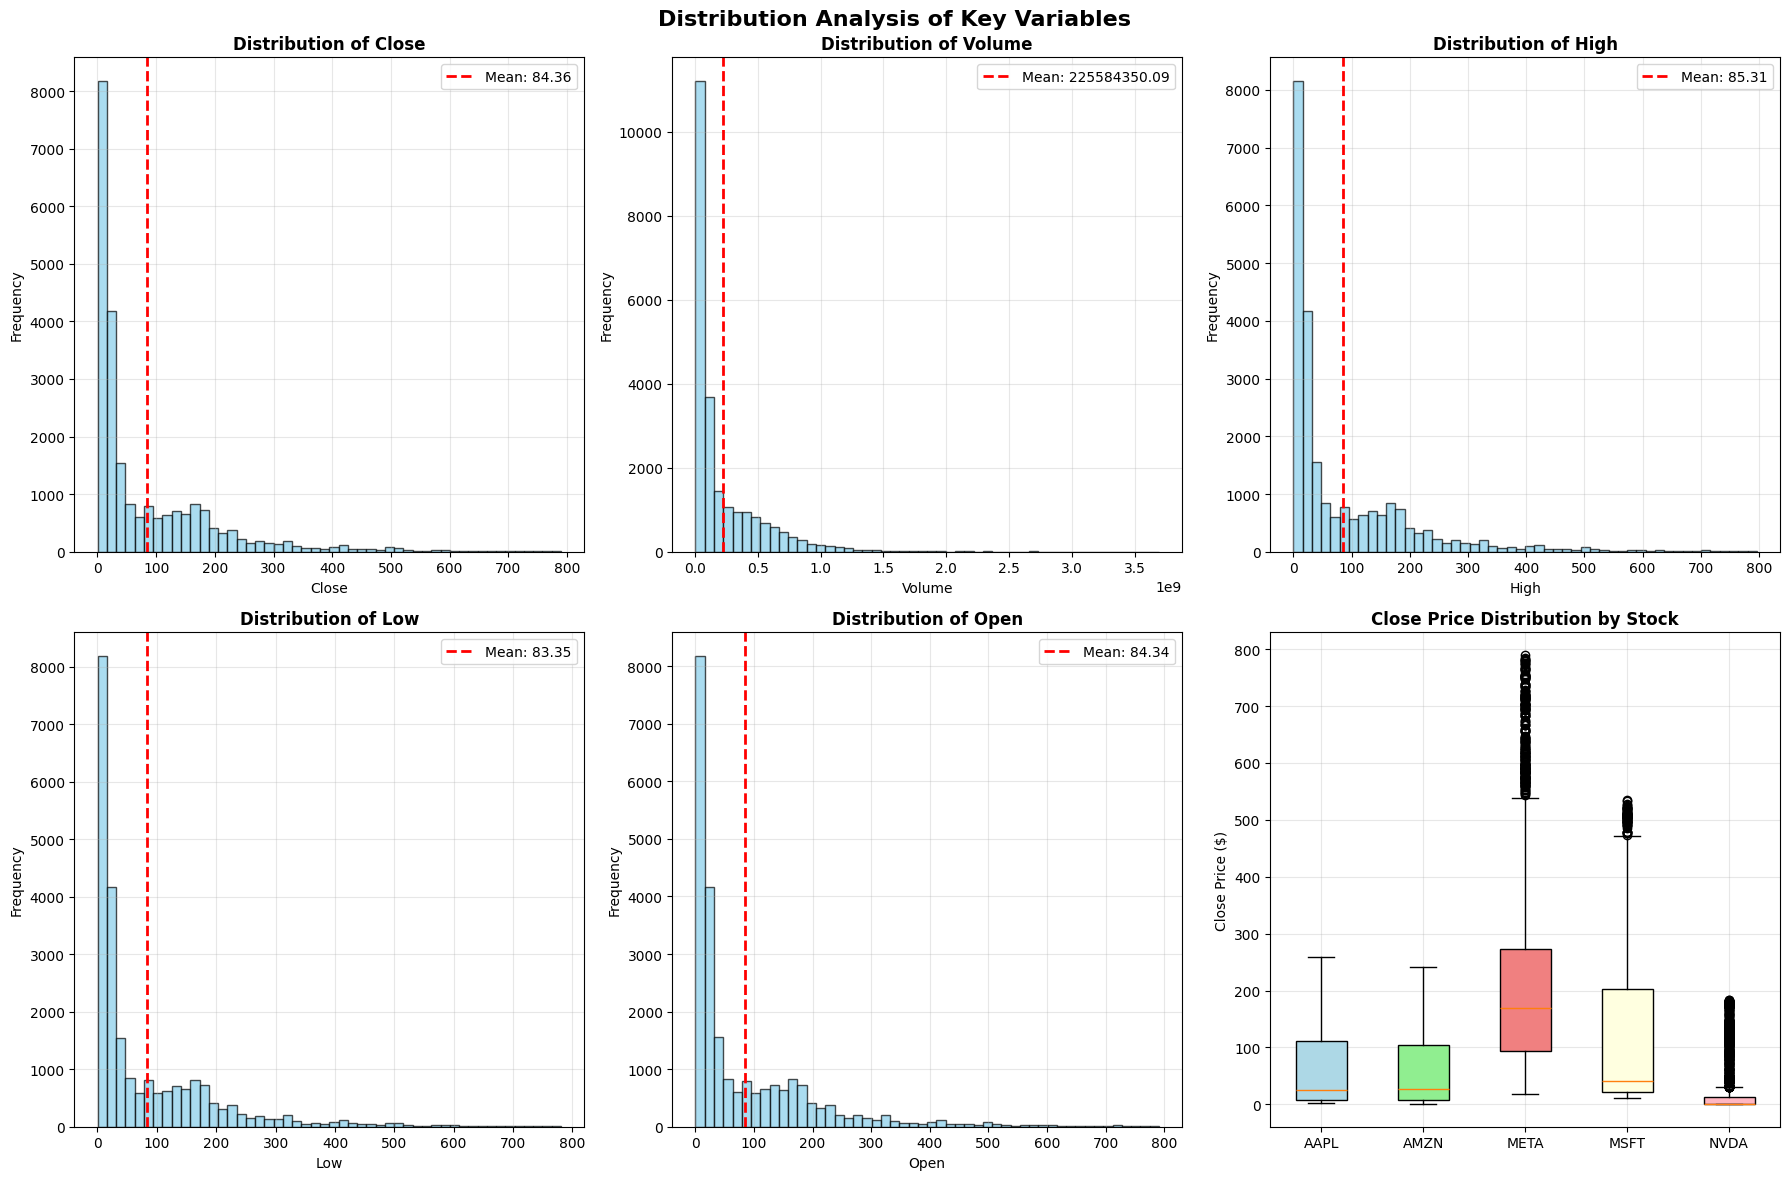

Distribution analysis completed - histograms and box plots generated

3.2 Relationship Analysis


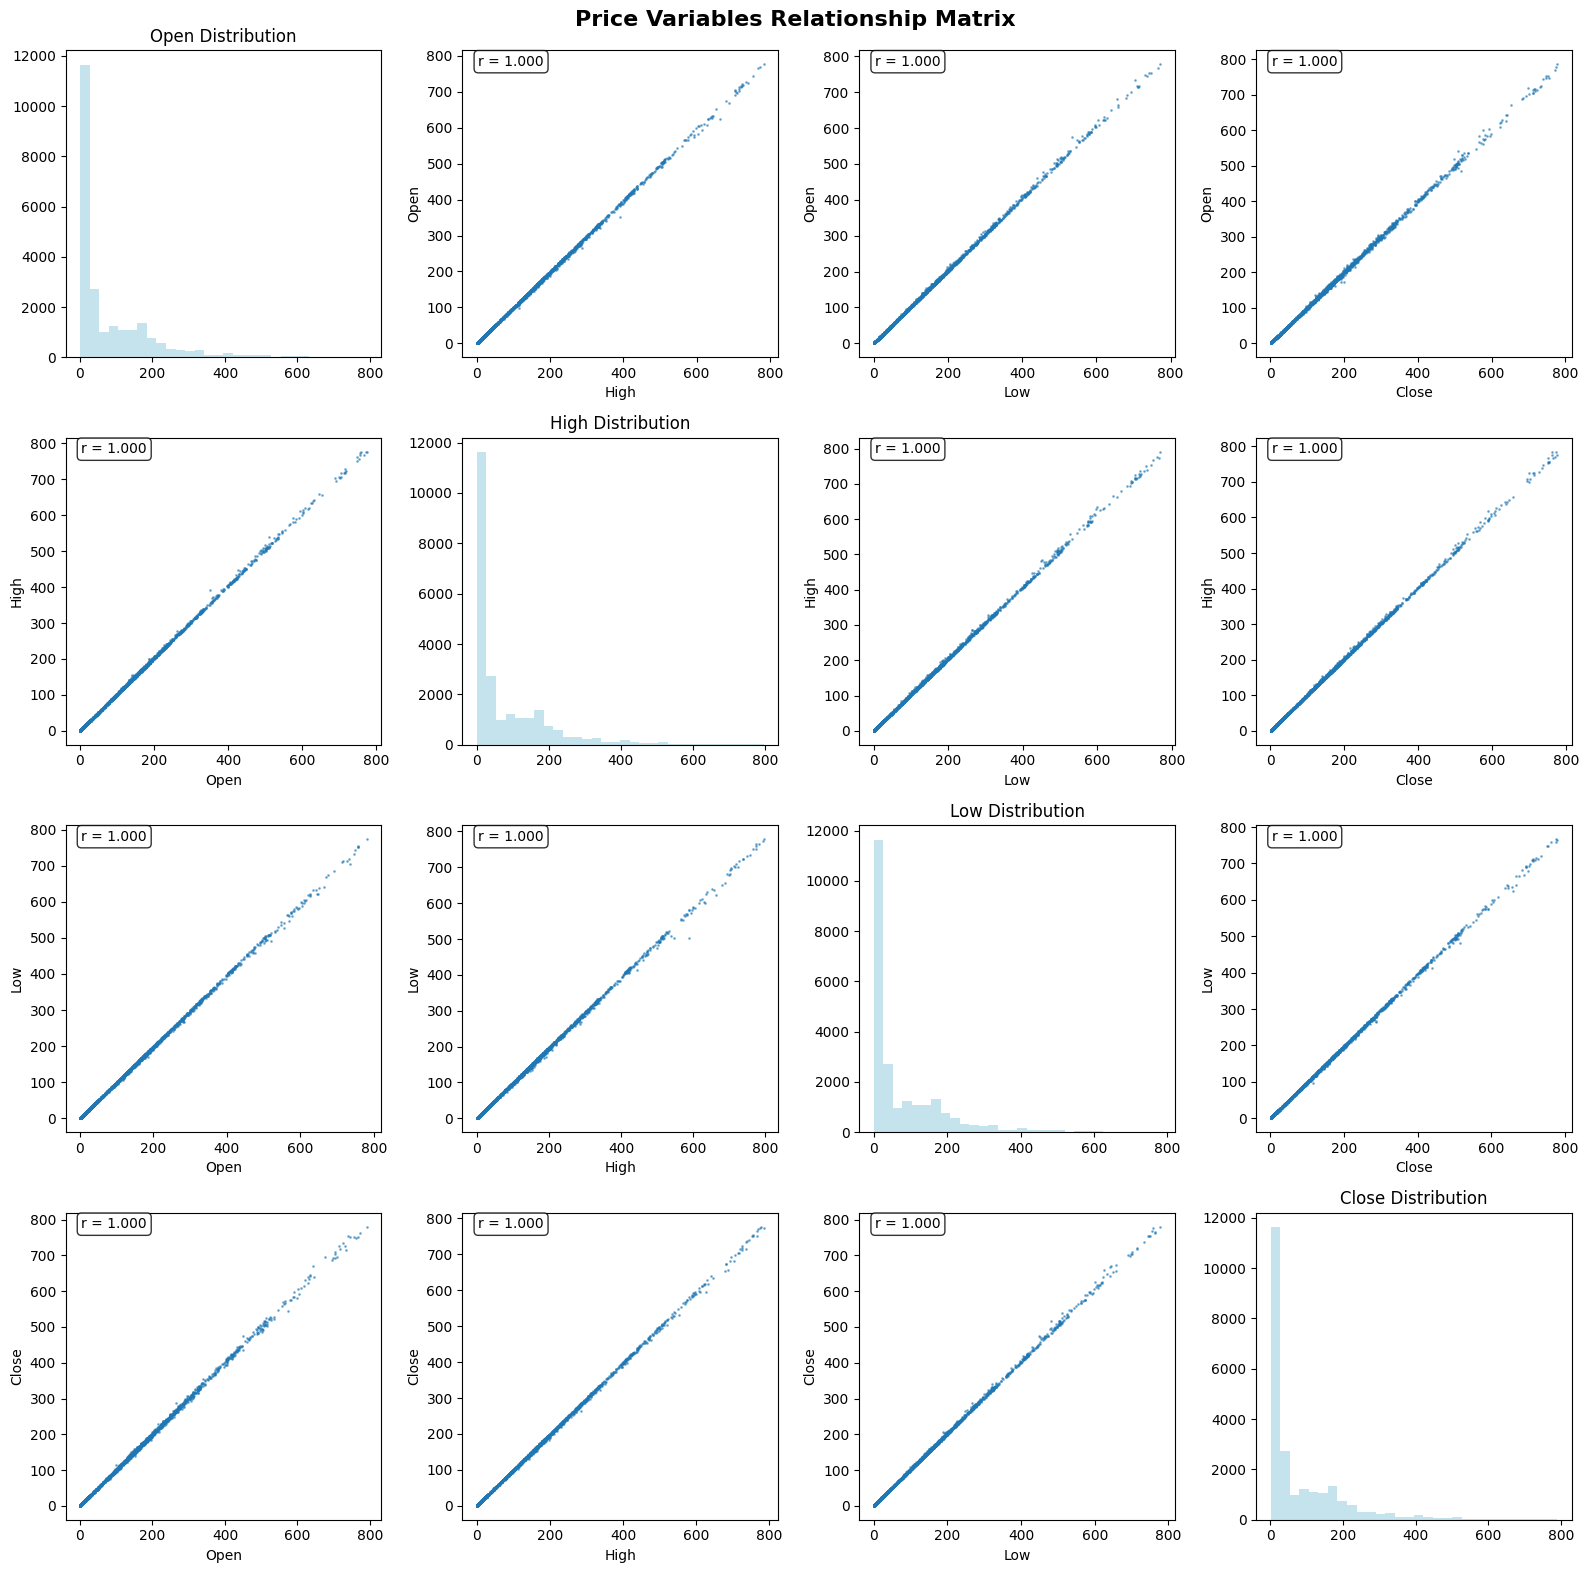

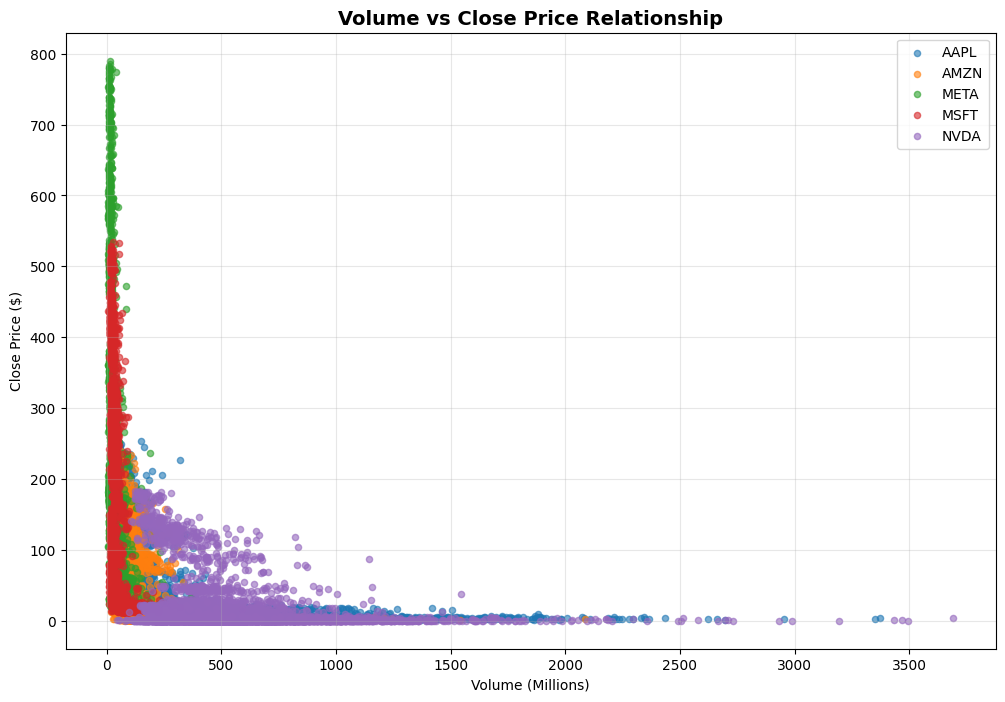

Relationship analysis completed - scatter plots and correlation matrix generated

SECTION 4: CORRELATION ANALYSIS
Correlation Matrix:
         Open   High   Low  Close  Volume
Open    1.000  1.000  1.00   1.00  -0.389
High    1.000  1.000  1.00   1.00  -0.389
Low     1.000  1.000  1.00   1.00  -0.390
Close   1.000  1.000  1.00   1.00  -0.390
Volume -0.389 -0.389 -0.39  -0.39   1.000


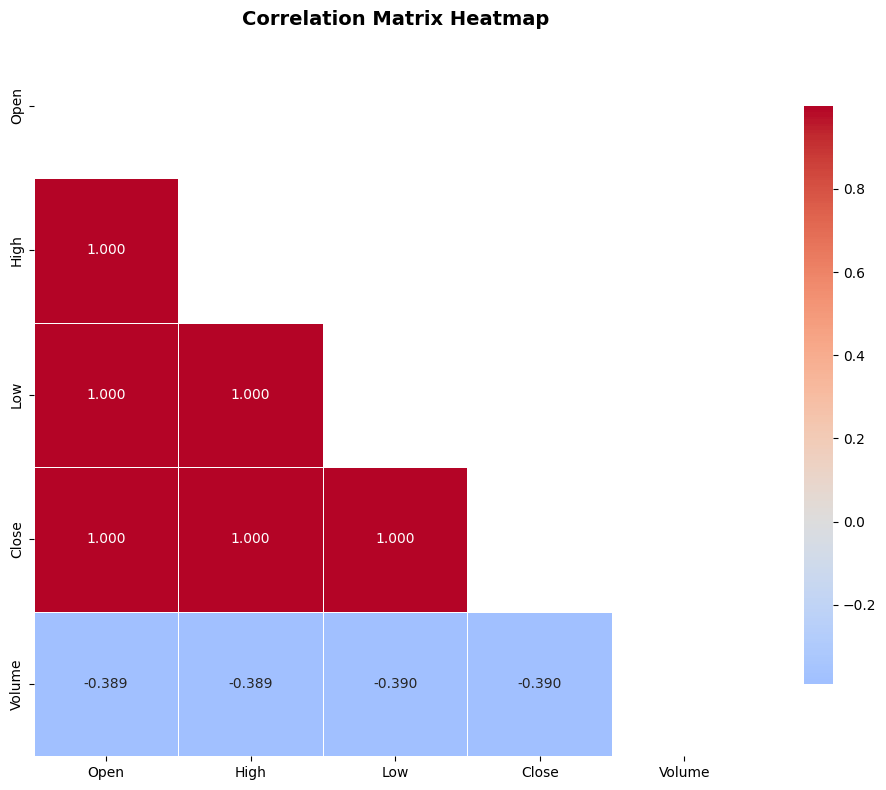


Strong Correlations (|r| > 0.7):
Variable 1 Variable 2  Correlation
      Open       High          1.0
      Open        Low          1.0
      Open      Close          1.0
      High        Low          1.0
      High      Close          1.0
       Low      Close          1.0
Correlation analysis completed with heatmap and key patterns identified

SECTION 5: DATA PREPROCESSING - FEATURE ENGINEERING
Applied Preprocessing Steps:
1. One-hot encoding for categorical variables
2. Feature scaling/normalization
3. Binary encoding for derived categories

Step 1: One-hot Encoding for 'Stock' variable
Created 5 dummy variables for stocks
New columns: ['Stock_AAPL', 'Stock_AMZN', 'Stock_META', 'Stock_MSFT', 'Stock_NVDA']

Step 2: Feature Scaling
Scaled features created: ['Open_scaled', 'High_scaled', 'Low_scaled', 'Close_scaled', 'Volume_scaled']

Scaling Statistics:
               Original_Mean  Original_Std  Scaled_Mean  Scaled_Std
Close           8.436420e+01  1.175303e+02          NaN      

In [14]:
# -*- coding: utf-8 -*-
"""
DATA601 Project - Step 2: Data Preprocessing and Feature Engineering
Complete implementation following the assignment rubric
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("DATA601 PROJECT - STEP 2: DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 60)

# =============================================================================
# SECTION 1: DATA UNDERSTANDING (0.5 marks)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 1: DATA UNDERSTANDING")
print("=" * 50)

# Use the combined_df from your previous work
# If starting fresh, uncomment and modify the data loading section below:

"""
# Data loading section (if starting fresh)
import os
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/SNP500/stock_data/'
stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'META']
stock_data = {}

for stock in stocks:
    file_path = f'{folder_path}{stock}.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Stock'] = stock
            df = df.sort_values('Date').dropna(how='any').reset_index(drop=True)
            stock_data[stock] = df
            print(f"Loaded {stock}: {len(df)}")

combined_df = pd.concat(stock_data.values(), ignore_index=True)
combined_df = combined_df.dropna(how='any').sort_values(['Date', 'Stock'])
combined_df['Prev_Close'] = combined_df.groupby('Stock')['Close'].shift(1)
combined_df = combined_df.dropna(how='any').reset_index(drop=True)
"""

print("Dataset Overview:")
print(f"Shape: {combined_df.shape}")
print(f"Date range: {combined_df['Date'].min()} to {combined_df['Date'].max()}")
print(f"Stocks included: {combined_df['Stock'].unique()}")

print("\nData Types and Missing Values:")
data_types_info = []
for col in combined_df.columns:
    dtype = combined_df[col].dtype
    null_count = combined_df[col].isna().sum()

    if 'object' in str(dtype):
        category = "Categorical"
    elif 'datetime' in str(dtype):
        category = "Date/Time"
    elif col == 'Volume':
        category = "Numeric (Count)"
    else:
        category = "Numeric (Financial)"

    data_types_info.append({
        'Column': col,
        'Data Type': category,
        'Missing Values': null_count,
        'Missing %': (null_count / len(combined_df)) * 100
    })

data_types_df = pd.DataFrame(data_types_info)
print(data_types_df.to_string(index=False))

print(f"\nStock Distribution:")
stock_dist = combined_df['Stock'].value_counts()
print(stock_dist)

# =============================================================================
# SECTION 2: SUMMARY STATISTICS (0.5 marks)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 2: SUMMARY STATISTICS")
print("=" * 50)

# Summary statistics for key variables
key_variables = ['Open', 'High', 'Low', 'Close', 'Volume']

print("Detailed Summary Statistics:")
summary_stats = []

for var in key_variables:
    if var in combined_df.columns:
        data = combined_df[var]
        stats = {
            'Variable': var,
            'Count': len(data),
            'Mean': data.mean(),
            'Median': data.median(),
            'Std Dev': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Q1': data.quantile(0.25),
            'Q3': data.quantile(0.75),
            'Range': data.max() - data.min(),
            'IQR': data.quantile(0.75) - data.quantile(0.25),
            'Skewness': data.skew()
        }
        summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print(summary_df.round(2).to_string(index=False))

print("\nSummary by Stock:")
stock_summary = combined_df.groupby('Stock')[key_variables].agg(['mean', 'std', 'min', 'max']).round(2)
print(stock_summary)

# =============================================================================
# SECTION 3: DATA VISUALIZATION (1.0 marks each - Distributions & Relationships)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 3: DATA VISUALIZATION")
print("=" * 50)

# 3.1 Visualize distributions of key variables (1.0 marks)
print("\n3.1 Distribution Analysis")

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# Plot distributions
variables_to_plot = ['Close', 'Volume', 'High', 'Low', 'Open']
for i, var in enumerate(variables_to_plot):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    # Histogram
    ax.hist(combined_df[var], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {var}', fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

    # Add mean line
    mean_val = combined_df[var].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
              label=f'Mean: {mean_val:.2f}')
    ax.legend()

# Box plots by stock for Close prices
ax = axes[1, 2]
box_data = [combined_df[combined_df['Stock'] == stock]['Close'] for stock in combined_df['Stock'].unique()]
box_plot = ax.boxplot(box_data, labels=combined_df['Stock'].unique(), patch_artist=True)
ax.set_title('Close Price Distribution by Stock', fontweight='bold')
ax.set_ylabel('Close Price ($)')
ax.grid(True, alpha=0.3)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

print("Distribution analysis completed - histograms and box plots generated")

# 3.2 Visualize relationships between variables (1.0 marks)
print("\n3.2 Relationship Analysis")

# Scatter plot matrix for price variables
price_vars = ['Open', 'High', 'Low', 'Close']
fig, axes = plt.subplots(len(price_vars), len(price_vars), figsize=(16, 16))
fig.suptitle('Price Variables Relationship Matrix', fontsize=16, fontweight='bold')

for i, var1 in enumerate(price_vars):
    for j, var2 in enumerate(price_vars):
        ax = axes[i, j]
        if i == j:
            # Diagonal - show distribution
            ax.hist(combined_df[var1], bins=30, alpha=0.7, color='lightblue')
            ax.set_title(f'{var1} Distribution')
        else:
            # Off-diagonal - show scatter plot
            # Sample data for better visualization (if dataset is large)
            sample_data = combined_df.sample(n=min(5000, len(combined_df)))
            ax.scatter(sample_data[var2], sample_data[var1], alpha=0.5, s=1)
            ax.set_xlabel(var2)
            ax.set_ylabel(var1)

            # Add correlation coefficient
            corr = combined_df[var1].corr(combined_df[var2])
            ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Volume vs Price relationship
plt.figure(figsize=(12, 8))
for stock in combined_df['Stock'].unique():
    stock_data = combined_df[combined_df['Stock'] == stock]
    plt.scatter(stock_data['Volume']/1e6, stock_data['Close'],
               alpha=0.6, label=stock, s=20)

plt.title('Volume vs Close Price Relationship', fontweight='bold', fontsize=14)
plt.xlabel('Volume (Millions)')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Relationship analysis completed - scatter plots and correlation matrix generated")

# =============================================================================
# SECTION 4: CORRELATION ANALYSIS (1.0 marks)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 4: CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix for numerical variables
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = combined_df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, fmt='.3f',
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.7):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.round(3).to_string(index=False))
else:
    print("No strong correlations (|r| > 0.7) found")

print("Correlation analysis completed with heatmap and key patterns identified")

# =============================================================================
# SECTION 5: DATA PREPROCESSING - FEATURE ENGINEERING (2.0 marks)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 5: DATA PREPROCESSING - FEATURE ENGINEERING")
print("=" * 50)

# Create a copy for preprocessing
df_processed = combined_df.copy()
df_processed = df_processed.sort_values(['Stock', 'Date']).reset_index(drop=True)

print("Applied Preprocessing Steps:")
print("1. One-hot encoding for categorical variables")
print("2. Feature scaling/normalization")
print("3. Binary encoding for derived categories")

# 1. One-hot encoding for Stock variable
print("\nStep 1: One-hot Encoding for 'Stock' variable")
stock_dummies = pd.get_dummies(df_processed['Stock'], prefix='Stock')
df_processed = pd.concat([df_processed, stock_dummies], axis=1)
print(f"Created {len(stock_dummies.columns)} dummy variables for stocks")
print(f"New columns: {list(stock_dummies.columns)}")

# 2. Feature Scaling - Create scaled versions of numerical features
print("\nStep 2: Feature Scaling")
scaler = StandardScaler()
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Fit and transform numerical features
scaled_features = scaler.fit_transform(df_processed[numerical_features])
scaled_feature_names = [f'{feature}_scaled' for feature in numerical_features]

# Add scaled features to dataframe
for i, col_name in enumerate(scaled_feature_names):
    df_processed[col_name] = scaled_features[:, i]

print(f"Scaled features created: {scaled_feature_names}")

# Show scaling statistics
scaling_stats = pd.DataFrame({
    'Original_Mean': df_processed[numerical_features].mean(),
    'Original_Std': df_processed[numerical_features].std(),
    'Scaled_Mean': df_processed[scaled_feature_names].mean(),
    'Scaled_Std': df_processed[scaled_feature_names].std()
}).round(4)
print("\nScaling Statistics:")
print(scaling_stats)

# 3. Binary encoding for derived features
print("\nStep 3: Binary Encoding")

# Create some derived features first for encoding
df_processed['Daily_Return'] = df_processed.groupby('Stock')['Close'].pct_change() * 100
df_processed['Daily_Volatility'] = ((df_processed['High'] - df_processed['Low']) / df_processed['Open'] * 100)
df_processed['Price_Change'] = df_processed.groupby('Stock')['Close'].diff()

# Binary encoding for positive/negative returns
df_processed['Positive_Return'] = (df_processed['Daily_Return'] > 0).astype(int)
df_processed['High_Volatility'] = (df_processed['Daily_Volatility'] > df_processed['Daily_Volatility'].median()).astype(int)
df_processed['Price_Increase'] = (df_processed['Price_Change'] > 0).astype(int)

print("Binary encoded features created:")
print("- Positive_Return: 1 if daily return > 0, 0 otherwise")
print("- High_Volatility: 1 if volatility > median, 0 otherwise")
print("- Price_Increase: 1 if price increased, 0 otherwise")

# Show encoding results
encoding_summary = pd.DataFrame({
    'Feature': ['Positive_Return', 'High_Volatility', 'Price_Increase'],
    'Count_0': [
        (df_processed['Positive_Return'] == 0).sum(),
        (df_processed['High_Volatility'] == 0).sum(),
        (df_processed['Price_Increase'] == 0).sum()
    ],
    'Count_1': [
        (df_processed['Positive_Return'] == 1).sum(),
        (df_processed['High_Volatility'] == 1).sum(),
        (df_processed['Price_Increase'] == 1).sum()
    ]
})
encoding_summary['Percentage_1'] = (encoding_summary['Count_1'] /
                                  (encoding_summary['Count_0'] + encoding_summary['Count_1'])) * 100

print("\nBinary Encoding Summary:")
print(encoding_summary.round(2))

# Remove rows with NaN values created during feature engineering
df_processed = df_processed.dropna().reset_index(drop=True)
print(f"\nFinal processed dataset shape: {df_processed.shape}")

# =============================================================================
# SECTION 6: TRAIN/TEST SPLIT (1.0 marks)
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 6: TRAIN/TEST SPLIT")
print("=" * 50)

# Prepare features and target
# Using 'Close' price as target for demonstration
target_variable = 'Close'
feature_columns = [col for col in df_processed.columns if col not in
                  ['Date', 'Stock', target_variable, 'Open', 'High', 'Low']]  # Exclude some to avoid data leakage

X = df_processed[feature_columns]
y = df_processed[target_variable]

print(f"Target variable: {target_variable}")
print(f"Number of features: {len(feature_columns)}")
print(f"Feature columns: {feature_columns[:10]}...")  # Show first 10

# Perform train/test split with stratification by stock
# Create stratification labels based on stock and return quartiles
df_processed['Return_Quartile'] = pd.qcut(df_processed['Daily_Return'].fillna(0),
                                        q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_processed['Stratify_Label'] = df_processed['Stock'] + '_' + df_processed['Return_Quartile'].astype(str)

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=df_processed['Stratify_Label']
)

print(f"\nTrain/Test Split Results:")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Feature dimensions: {X_train.shape[1]}")

# Verify stratification worked
train_indices = X_train.index
test_indices = X_test.index

train_stock_dist = df_processed.loc[train_indices, 'Stock'].value_counts(normalize=True)
test_stock_dist = df_processed.loc[test_indices, 'Stock'].value_counts(normalize=True)

print("\nStock Distribution Verification:")
distribution_comparison = pd.DataFrame({
    'Train_Proportion': train_stock_dist,
    'Test_Proportion': test_stock_dist
}).round(3)
print(distribution_comparison)

# Check for proper randomization
print(f"\nRandomization Check:")
print(f"Training set date range: {df_processed.loc[train_indices, 'Date'].min()} to {df_processed.loc[train_indices, 'Date'].max()}")
print(f"Test set date range: {df_processed.loc[test_indices, 'Date'].min()} to {df_processed.loc[test_indices, 'Date'].max()}")

print("Train/test split completed with proper stratification and randomization")

# =============================================================================
# SECTION 7: FINAL SUMMARY AND EXPORT
# =============================================================================

print("\n" + "=" * 50)
print("SECTION 7: PREPROCESSING SUMMARY")
print("=" * 50)

print("DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print("\nSummary of Applied Transformations:")
print("✓ Data understanding and type classification")
print("✓ Comprehensive summary statistics")
print("✓ Distribution visualizations (histograms, box plots)")
print("✓ Relationship analysis (scatter plots, correlation matrix)")
print("✓ Correlation analysis with heatmap")
print("✓ One-hot encoding for categorical variables")
print("✓ Feature scaling/standardization")
print("✓ Binary encoding for derived features")
print("✓ Stratified train/test split (70/30)")

print(f"\nFinal Dataset Characteristics:")
print(f"- Total samples: {len(df_processed)}")
print(f"- Total features: {len(feature_columns)}")
print(f"- Training samples: {len(X_train)}")
print(f"- Test samples: {len(X_test)}")
print(f"- Target variable: {target_variable}")

# Save processed data for next steps
df_processed.to_csv('processed_stock_data.csv', index=False)
print(f"\n✓ Processed data saved as 'processed_stock_data.csv'")

# Save train/test splits
train_data = df_processed.loc[train_indices].copy()
test_data = df_processed.loc[test_indices].copy()

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
print(f"✓ Train/test splits saved as separate CSV files")

print(f"\n🎯 STEP 2 COMPLETED - Ready for Step 3: Model Building!")
print("=" * 60)